In [1]:
from ga_regression import *
from matplotlib import pyplot as plt
from functools import partial
import PIL
import matplotlib as mpl
from matplotlib.cm import ScalarMappable
from pvutils import iter_subplots
from pyvista import PolyData
import pyvista as pv
from scipy.stats import pearsonr

C:\Users\dg\.conda\envs\diffnet4\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\dg\Documents\python\diffusion-net\experiments\regression_0\ga_regression.py:23: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# RUN 9 / 10
file = Path(r"D:\resynth\run_09_10\run00009_resynth\2025-08-08-12-28-22\opts_and_metadata.pt")

# RUN 20 / 21
file = Path(r"D:\resynth\run_20_21\run00020_resynth\2025-08-09-07-18-37\opts_and_metadata.pt")

# run 38 / 39
file = Path(r"D:\resynth\run_38_39\run00038_resynth\2025-08-09-17-21-56\opts_and_metadata.pt")

# run 42 / 43
file = Path(r"D:\resynth\run_42_43\run00042_resynth\2025-08-11-14-04-05\opts_and_metadata.pt")

# # run 48 / 49
# file = Path(r"D:\resynth\run_48_49\run00048_resynth\2025-08-11-06-09-16\opts_and_metadata.pt")

# # RUN 51 / 52
# file = Path(r"D:\resynth\run_51_52\run00051_resynth\2025-08-07-12-07-53\opts_and_metadata.pt")


# THE LINEAR LAYER STUFF
file = Path(r"D:\resynth\run_09_10\run00009_resynth\2025-08-22-13-48-14\opts_and_metadata.pt")
file = Path(r"D:\resynth\run_51_52\run00051_resynth\2025-08-23-12-28-45\opts_and_metadata.pt")

file = Path(r"D:\resynth\run_51_52\run00051_resynth\2025-08-27-16-39-39\opts_and_metadata.pt")  # base aug test
file = Path(r"D:\resynth\run_51_52\run00051_resynth\2025-08-30-09-41-42\opts_and_metadata.pt")  # just rotations
file = Path(r"D:\resynth\run_51_52\run00051_resynth\2025-08-31-09-39-37\opts_and_metadata.pt")  # best rot and translations
file = Path(r"D:\resynth\run_51_52\run00051_resynth\2025-09-01-09-10-12\opts_and_metadata.pt")  # rot, trans, scale
file = Path(r"D:\resynth\run_51_52\run00051_resynth\2025-09-03-08-48-00\opts_and_metadata.pt")

readers = Readers.from_file(file)
# to try:
# number of diffnet layers
# normalize verts?

In [3]:
readers.hparams.iloc[:, 3:]

,input_features,channel,k_eig,learning_rate,decay_every,decay_rate,n_blocks,dropout,n_faces,spike_window,isolate_channel_idx,weight_error,augment,use_visible,use_color,norm_verts,curr_learning_rate,ultimate_linear
0,xyz,"(0, 2, 29, 5, 17, 23, 14, 31, 18, 30, 7, 25, 3...",128,0.0001,25,0.5,4,False,500,"(0.07, 0.75)",None,None,"AugmentMode(desc='mild', max_rotate=0.52359877...",None,None,None,7.812500e-07,False
1,xyz,"(0, 2, 29, 5, 17, 23, 14, 31, 18, 30, 7, 25, 3...",128,0.0001,25,0.5,4,False,500,"(0.07, 0.75)",None,None,"AugmentMode(desc='med', max_rotate=0.785398163...",None,None,None,7.812500e-07,False
2,xyz,"(0, 2, 29, 5, 17, 23, 14, 31, 18, 30, 7, 25, 3...",128,0.0001,25,0.5,4,False,500,"(0.07, 0.75)",None,None,"AugmentMode(desc='hot', max_rotate=1.047197551...",None,None,None,7.812500e-07,False
3,xyz,"(0, 2, 29, 5, 17, 23, 14, 31, 18, 30, 7, 25, 3...",128,0.0001,25,0.5,4,False,500,"(0.07, 0.75)",None,None,None,None,None,None,7.812500e-07,False


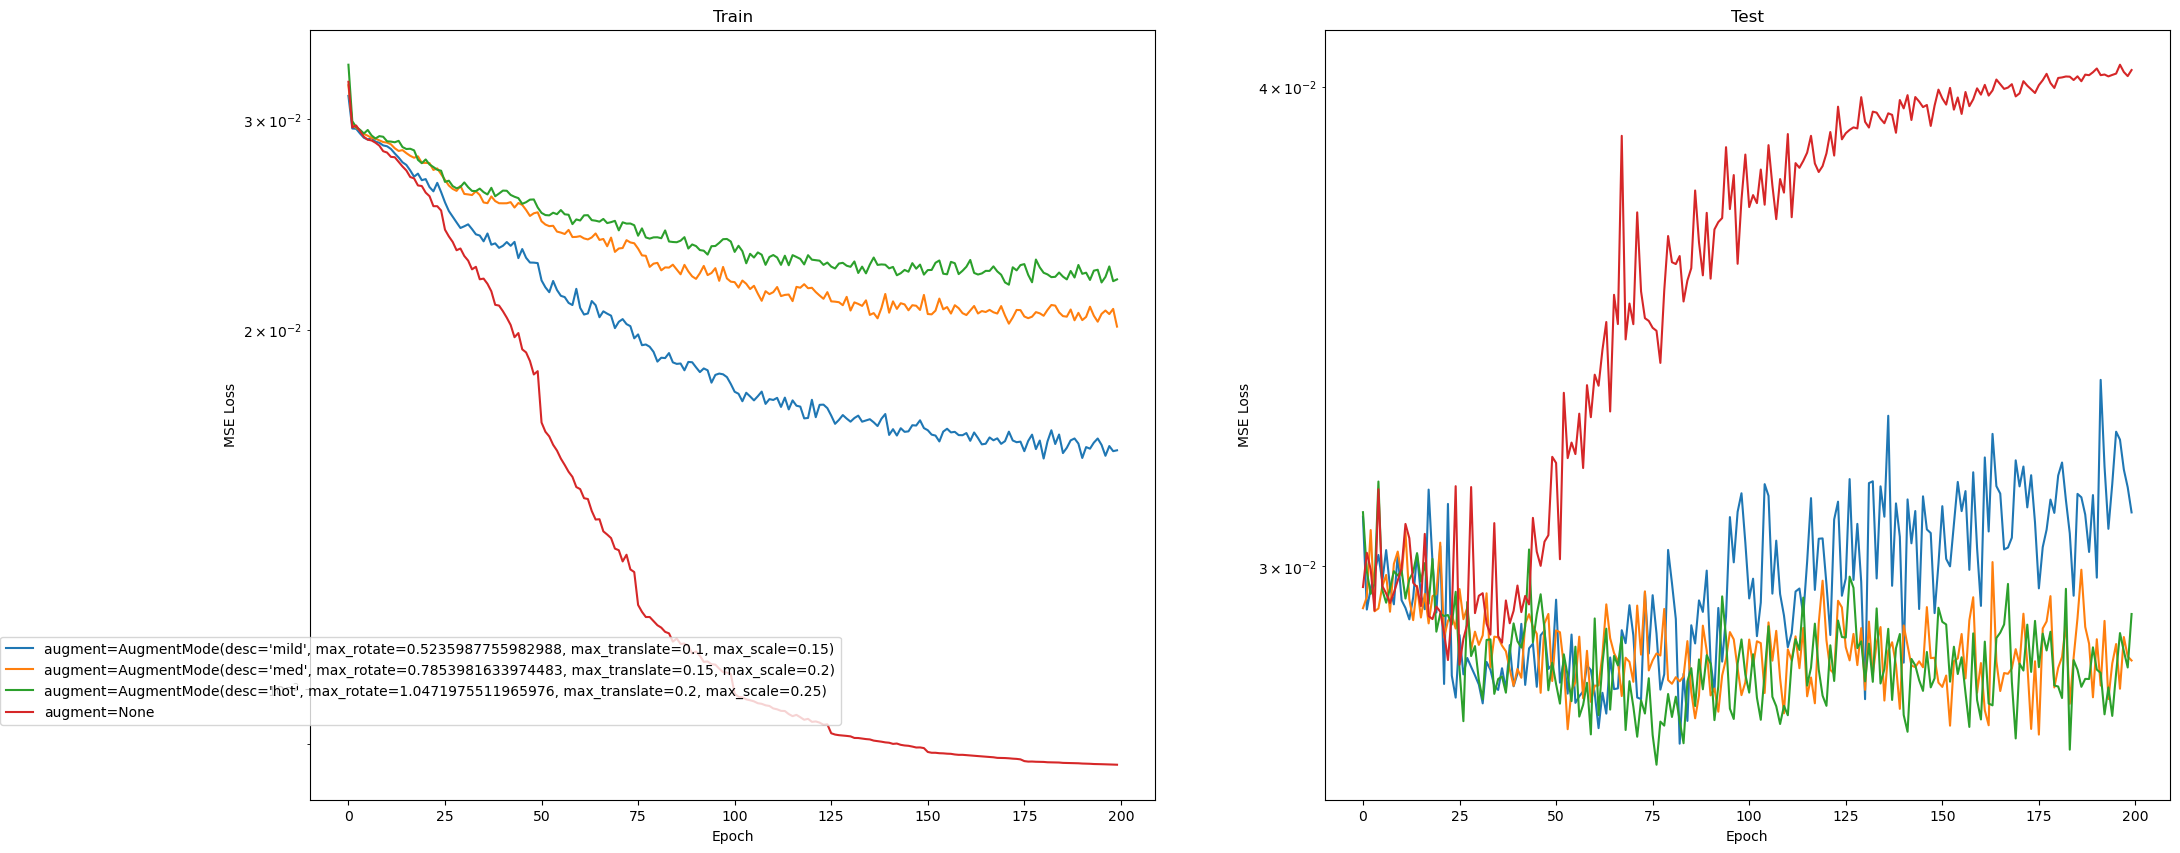

In [4]:
fig, axs = readers.plot_training(tags=None, mode='loss', legend=(0, .15), sharey=False, figsize=(24, 10))

Text(0.5, 0, 'Min test loss')

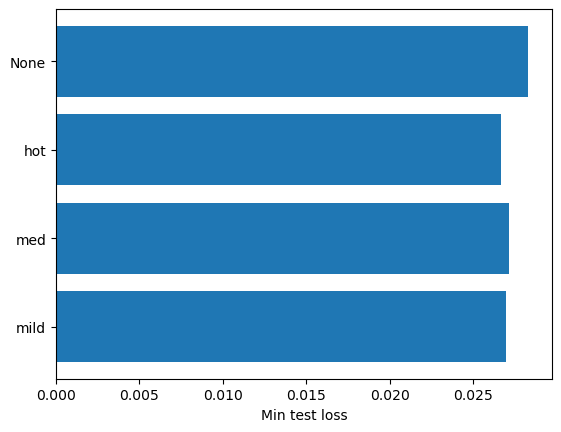

In [5]:
r = readers[0]
min_loss = [r.scalar('loss/test')[1].min() for r in readers]
labels = [x.desc if x else 'None' for x in readers.hparams.augment]
plt.barh(labels, min_loss)
plt.xlabel('Min test loss')

In [6]:
list(label)

NameError: name 'label' is not defined

In [ ]:
readers.scatter_plots(tags=None)  # TODO ability to load last-trained model

# TODO TRY FREEZING AND TRAINING ONLY THE LINEAR LAYER?